In [2]:
import PyDSTool as dst
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# name
DSargs = dst.args(name='BTB-SN')
# parameters
DSargs.pars = { 'a': -0.5,
                'b': 0.5,
                'phi': 0.1}
# rhs of the differential equation
DSargs.varspecs = {'x': 'a*x**3 + b*x + phi'}
# initial conditions
DSargs.ics      = {'x': -1.0}

LP Point found 
LP Point found 


Text(0.5, 1.0, 'Bifurcation diagram BTB-SN')

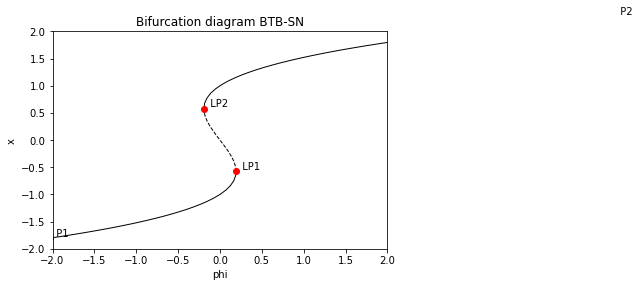

In [4]:
# Prepare the system to start close to a steady state
ode  = dst.Generator.Vode_ODEsystem(DSargs)     # an instance of the 'Generator' class.
ode.set(pars = {'phi': -2.} )     # Lower bound of the control parameter 
ode.set(ics =  {'x': -2.} )       # Close to one of the steady states present for this parameter

PC = dst.ContClass(ode)         # Set up continuation class

PCargs = dst.args(name='EQ1', type='EP-C')     # 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs.freepars     = ['phi']                    # control parameter(s) (it should be among those specified in DSargs.pars)
PCargs.MaxNumPoints = 100                      # The following 3 parameters are set after trial-and-error
PCargs.MaxStepSize  = 0.1
PCargs.MinStepSize  = 1e-5
PCargs.StepSize     = 2e-2
PCargs.LocBifPoints = 'LP'                     # detect limit points / saddle-node bifurcations
PCargs.SaveEigen    = True                     # to tell unstable from stable branches
PC.newCurve(PCargs)
PC['EQ1'].forward()
PC.display(['phi','x'], stability=True, figure=3)  # stable and unstable branches as solid and dashed curves, resp.
plt.xlim(-2,2)
plt.ylim(-2.,2)
plt.title("Bifurcation diagram BTB-SN")

In [5]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def fsyst(x, p, t):
    f = np.empty((1,))
    p['phi'] = p['phi0'] + p['alpha'] * t
    f[0] = p['a'] * x[0]**3 + p['b'] * x[0] + p['phi']
    return f
def f(t,X):
    return fsyst(X,p,t)

Text(0, 0.5, '$x$')

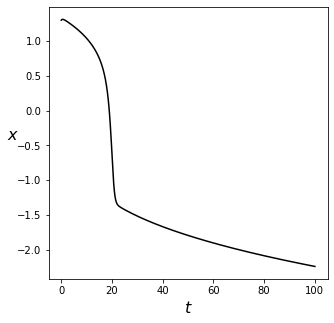

In [14]:
p={}

p['a']= -0.5
p['b']= 0.5
p['alpha'] = -0.05
p['phi0'] = 0.5 

p['T']=100
p['dt']=0.005
p['steps']= int(p['T']//p['dt'])
#Initial conditions
X_0=[1.3]
sol1 = solve_ivp(f,(0,p['T']),X_0,method='RK45',vectorized=True,max_step=p['dt'])

plt.figure(1,figsize=(5,5))
plt.plot(sol1.t,sol1.y[0,:],'k')
plt.xlabel(r'$t$',fontsize=16); plt.ylabel(r'$x$',fontsize=16,rotation=0)